# 2D geological cross-sections. 

We import the math libraries, data analysis libraries and plot libraries.

In [1]:
# math libraries

import numpy as np
import sympy

from sympy import *
t = Symbol('t')

from scipy.interpolate import interp2d
from scipy.interpolate import griddata

import math

# data analysis library
import pandas as pd


# import plotting libraries
import plotly.offline as go_offline
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

We set the data and figures directories

In [2]:
DATADIR='data/' # Directory with the data
FIGURESDIR='figures/' # Figures produced

## Reading the geological data

### Read the topography data

In [3]:
# Topography data

topo=pd.read_csv(DATADIR+'topografy.csv')

We split the data in topo to get three numpy arrays

In [4]:
topo1=topo[['UTM_X','UTM_Y','elevation']].to_numpy()
topox=[x[0] for x in topo1]
topoy=[x[1] for x in topo1]
topoelv=[x[2] for x in topo1]

In the list cotasxy we set the dimensions of the model.

In [5]:
cotasxy=[min(topox)+200,max(topox)-2000,min(topoy)+100,max(topoy)-200]

### Read contacts and fauls data

With the following function <span style="color:blue">contact_tr</span> we process the data from the cvs files in which the stratigraphic and mechanical data are stored

In [6]:
def contact_tr(csv,elevation_gain):
    tr=pd.read_csv(csv)
    tr1=tr[['UTM_X','UTM_Y','elevation']].to_numpy()
    tx=[x[0] for x in tr1]
    ty=[x[1] for x in tr1]
    telv=[x[2]+elevation_gain for x in tr1]
    return [tx,ty,telv]


Load and process the data

In [7]:
# mechanic contacts

palomeque=contact_tr(DATADIR+'palomeque.csv',0)+['palomeque_thrust']
palomeque_ds=contact_tr(DATADIR+'palomeque_ds.csv',0)+['palomeque_desplazado']
calvillo=contact_tr(DATADIR+'calvillo.csv',0)+['calvillo_thrust']
calvillo_ds=contact_tr(DATADIR+'calvillo_ds.csv',0)+['calvillo_desplazado']

# faults

fault2=contact_tr(DATADIR+'fault2.csv',0)+['fault2']
fault1=contact_tr(DATADIR+'fault1.csv',0)+['fault1']
fault3=contact_tr(DATADIR+'fault3.csv',0)+['fault1']

# stratigraphic contacts

E12cal=contact_tr(DATADIR+'E1E2 calvillo.csv',0)+['E1-E2 calvillo']
E12pal=contact_tr(DATADIR+'E1E2 palomeque.csv',0)+['E1-E2 palomeque']
E23pal=contact_tr(DATADIR+'E2E3 palomeque.csv',0)+['E2-E3 palomeque']
E3Opal=contact_tr(DATADIR+'E3O palomeque.csv',0)+['E3-O palomeque']
PEpal=contact_tr(DATADIR+'PE palomeque.csv',0)+['P-E palomeque']
PEcal=contact_tr(DATADIR+'PE calvillo.csv',0)+['P-E calvillo']
E12cal_ds=contact_tr(DATADIR+'E1E2 calvillo_ds.csv',0)+['E1-E2 calvillo ds']
E12pal_ds=contact_tr(DATADIR+'E1E2 palomeque_ds.csv',0)+['E1-E2 palomeque ds']

In [8]:
cont=[palomeque_ds,palomeque,calvillo,calvillo_ds]
cab=[E12cal,E12pal,E23pal,E3Opal,PEpal,PEcal,E12cal_ds,E12pal_ds]
fal=[fault1,fault2,fault3]

### Define the cross-sections

Sections are determined by vertical planes which in turn are determined by two points. Let's build these sections. First we read the data an create the corresponding numpy arrays.

In [9]:
sections=pd.read_csv(DATADIR+'sections.csv')

sections1=sections[['UTM_X','UTM_Y','elevation','point']].to_numpy()
secx=[x[0] for x in sections1]
secy=[x[1] for x in sections1]
secelv=[x[2] for x in sections1]
secp=[x[3] for x in sections1]

# split the data
secx2=[(secx[i],secx[i+1]) for i in range(len(secx)-1)]
secy2=[(secy[i],secy[i+1]) for i in range(len(secx)-1)]
secelv2=[(secelv[i],secelv[i+1]) for i in range(len(secx)-1)]

In [10]:
points=[[(secx[i],secy[i],secelv[i]),secp[i]] for i in range(len(secx))]

In [11]:
# The directions of the cross-sections

d1=(secx[1]-secx[0],secy[1]-secy[0])
d2=(secx[3]-secx[2],secy[3]-secy[2])
d3=(secx[5]-secx[4],secy[5]-secy[4])
d4=(secx[7]-secx[6],secy[7]-secy[6])
d5=(secx[9]-secx[8],secy[9]-secy[8])

# normalized

d1n=(d1[0]/np.sqrt(d1[0]**2+d1[1]**2),d1[1]/np.sqrt(d1[0]**2+d1[1]**2))
d2n=(d2[0]/np.sqrt(d2[0]**2+d2[1]**2),d2[1]/np.sqrt(d2[0]**2+d2[1]**2))
d3n=(d3[0]/np.sqrt(d3[0]**2+d3[1]**2),d3[1]/np.sqrt(d3[0]**2+d3[1]**2))
d4n=(d4[0]/np.sqrt(d4[0]**2+d4[1]**2),d4[1]/np.sqrt(d4[0]**2+d4[1]**2))
d5n=(d5[0]/np.sqrt(d5[0]**2+d5[1]**2),d5[1]/np.sqrt(d5[0]**2+d5[1]**2))

We do not want a straight line to represent, for example, the section A-A$^\prime$ but a line that follows the topography. To get this line, we define points on the line and then we get their elevations. We save this data in the atopo.cvs file and do this process for each section. We also process the data to get numpy arrays.

In [12]:
# Topography A-A'

Atopo=pd.read_csv(DATADIR+'atopo.csv')


Atopo1=Atopo[['UTM_X','UTM_Y','elevation']].to_numpy()

Atopox=[x[0] for x in Atopo1]
Atopoy=[x[1] for x in Atopo1]
Atopoelv=[x[2] for x in Atopo1]

ca=[Atopox,Atopoy,Atopoelv,'A-A$^\prime$']

# Topography B-B'

Btopo=pd.read_csv(DATADIR+'Btopo.csv')


Btopo1=Btopo[['UTM_X','UTM_Y','elevation']].to_numpy()

Btopox=[x[0] for x in Btopo1]
Btopoy=[x[1] for x in Btopo1]
Btopoelv=[x[2] for x in Btopo1]

cb=[Btopox,Btopoy,Btopoelv,'B-B$^\prime$']

# Topography C-C'

Ctopo=pd.read_csv(DATADIR+'Ctopo.csv')


Ctopo1=Ctopo[['UTM_X','UTM_Y','elevation']].to_numpy()

Ctopox=[x[0] for x in Ctopo1]
Ctopoy=[x[1] for x in Ctopo1]
Ctopoelv=[x[2] for x in Ctopo1]

cc=[Ctopox,Ctopoy,Ctopoelv,'C-C$^\prime$']

# Topography D-D'

Dtopo=pd.read_csv(DATADIR+'Dtopo.csv')


Dtopo1=Dtopo[['UTM_X','UTM_Y','elevation']].to_numpy()

Dtopox=[x[0] for x in Dtopo1]
Dtopoy=[x[1] for x in Dtopo1]
Dtopoelv=[x[2] for x in Dtopo1]

cd=[Dtopox,Dtopoy,Dtopoelv,'D-D$^\prime$']

# Topography E-E'

Etopo=pd.read_csv(DATADIR+'Etopo.csv')


Etopo1=Etopo[['UTM_X','UTM_Y','elevation']].to_numpy()

Etopox=[x[0] for x in Etopo1]
Etopoy=[x[1] for x in Etopo1]
Etopoelv=[x[2] for x in Etopo1]
Etopot=[np.sqrt(Etopox[i]**2+Etopoy[i]**2) for i in range(len(Etopox))]

ce=[Etopox,Etopoy,Etopoelv,r'$E-E^\prime$']

sections=[ca,cb,cc,cd,ce]

## The sketch map

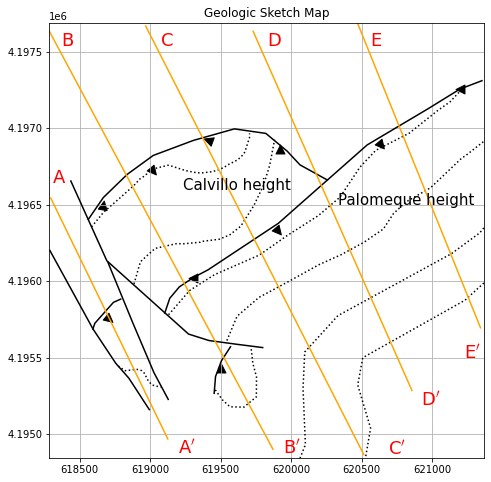

In [13]:
fig, ax = plt.subplots(1,figsize=(8,8))
for x in cont:
    ax.plot(x[0],x[1],color='black')
for x in cab:
    ax.plot(x[0],x[1],linestyle='dotted',color='black')
for x in fal:
    ax.plot(x[0],x[1],color='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(80)
ax.scatter([calvillo[0][1]],
        [calvillo[1][1]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(310)
ax.scatter([calvillo[0][3]],
        [calvillo[1][3]-100],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(250)
ax.scatter([calvillo[0][4]+100],
        [calvillo[1][4]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([calvillo[0][6]+100],
        [calvillo[1][6]-100],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(50)
ax.scatter([calvillo_ds[0][1]-30],
        [calvillo_ds[1][1]-110],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([palomeque_ds[0][1]],
        [palomeque_ds[1][1]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([palomeque[0][3]],
        [palomeque[1][3]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(310)
ax.scatter([palomeque[0][5]],
        [palomeque[1][5]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(40)
ax.scatter([palomeque[0][6]+100],
        [palomeque[1][6]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='^')
t._transform = t.get_transform().rotate_deg(90)
ax.scatter([palomeque[0][8]],
        [palomeque[1][8]],marker=t,s=80,c='black')

ax.plot([secx[0],secx[1]],[secy[0],secy[1]],c='orange')
plt.text(secx[0]+100, secy[0]+100, 'A', ha='right', fontsize=18,c='r')
plt.text(secx[1]+200, secy[1]-100, 'A$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[2],secx[3]],[secy[2],secy[3]],c='orange')
plt.text(secx[2]+200, secy[2]-150, 'B', ha='right', fontsize=18,c='r')
plt.text(secx[3]+200, secy[1]-100, 'B$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[4],secx[5]],[secy[4],secy[5]],c='orange')
plt.text(secx[4]+200, secy[2]-150, 'C', ha='right', fontsize=18,c='r')
plt.text(secx[5]+300, secy[5], 'C$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[6],secx[7]],[secy[6],secy[7]],c='orange')
plt.text(secx[6]+200, secy[2]-150, 'D', ha='right', fontsize=18,c='r')
plt.text(secx[7]+200, secy[7]-100, 'D$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[8],secx[9]],[secy[8],secy[9]],c='orange')
plt.text(secx[8]+200, secy[2]-150, 'E', ha='right', fontsize=18,c='r')
plt.text(secx[9], secy[9]-200, 'E$^\prime$', ha='right', fontsize=18,c='r')


ax.text(620000,4196600,'Calvillo height',ha='right', fontsize=15,c='black')
ax.text(621300,4196500,'Palomeque height',ha='right', fontsize=15,c='black')

plt.ylim((secy[9]-850,secy[2]))
plt.xlim((secx[0]-10,621370))

#ax.plot([618000,618500,618500,618000,618000],[4195000,4195000,4194500,4194500,4195000])

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)


ax.grid()
plt.title('Geologic Sketch Map')
plt.savefig(FIGURESDIR+'sketch_map.png',facecolor='white')


To color the previous map we will define polygons that enclose the corresponding ares and then we will color their interior with the chosen color

In [14]:
pol1=[calvillo[0][:6]+PEcal[0][::-1]+calvillo[0][:1],calvillo[1][:6]+PEcal[1][::-1]+calvillo[1][:1]]

pol2=[PEcal[0]+[calvillo[0][6]]+E12cal[0][::-1]+[fault1[0][1],PEcal[0][0]],
      PEcal[1]+[calvillo[1][6]]+E12cal[1][::-1]+[fault1[1][1],PEcal[1][0]]]

pol3=[E12cal[0]+calvillo[0][7:]+palomeque[0][:6][::-1]+[E12cal[0][0]],
      E12cal[1]+calvillo[1][7:]+palomeque[1][:6][::-1]+[E12cal[1][0]]]

pol4=[palomeque[0][:-2]+PEpal[0][::-1]+[palomeque[0][0]],
      palomeque[1][:-2]+PEpal[1][::-1]+[palomeque[1][0]]]

pol5=[PEpal[0]+[palomeque[0][-1]]+E12pal[0][::-1]+fault1[0][-4:-2][::-1]+[PEpal[0][0]],
      PEpal[1]+[palomeque[1][-1]]+E12pal[1][::-1]+fault1[1][-4:-2][::-1]+[PEpal[1][0]]]

pol6=[palomeque_ds[0]+E12pal_ds[0]+[palomeque_ds[0][0]],
      palomeque_ds[1]+E12pal_ds[1]+[palomeque_ds[1][0]]]

pol7=[E23pal[0]+E3Opal[0][::-1]+[E23pal[0][0]],
      E23pal[1]+E3Opal[1][::-1]+[E23pal[1][0]]]

pol8=[calvillo_ds[0][::-1]+[fault2[0][-2]]+E12cal_ds[0][::-1]+[calvillo_ds[0][-1]],
      calvillo_ds[1][::-1]+[fault2[1][-2]]+E12cal_ds[1][::-1]+[calvillo_ds[1][-1]]]

pol9=[[secx[0]-10,fault3[0][-1]]+calvillo_ds[0][::-1]+calvillo[0]+palomeque[0][6:]+[621420,secx[0]-10],
      [secy[2],fault3[1][-1]]+calvillo_ds[1][::-1]+calvillo[1]+palomeque[1][6:]+[secy[2],secy[2]]]

pol10=[[fault3[0][-1]]+calvillo_ds[0][::-1]+fault1[0][1:4]+E12pal[0]+E23pal[0][::-1]+[secx[0]-10,fault3[0][-1]],
       [fault3[1][-1]]+calvillo_ds[1][::-1]+fault1[1][1:4]+E12pal[1]+E23pal[1][::-1]+[secy[9]-900,fault3[1][-1]]]

pol11=[E3Opal[0],
       E3Opal[1]]

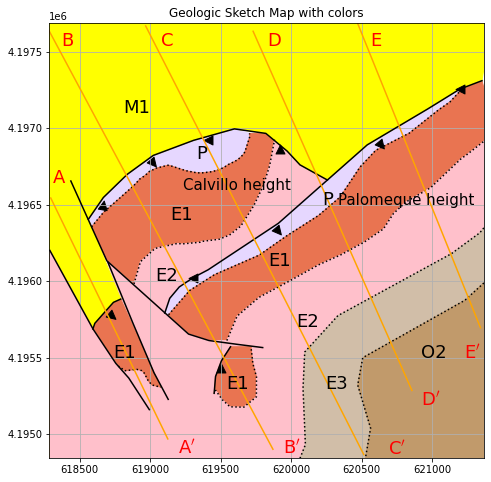

In [15]:
fig, ax = plt.subplots(1,figsize=(8,8))
for x in cont:
    ax.plot(x[0],x[1],color='black')
for x in cab:
    ax.plot(x[0],x[1],linestyle='dotted',color='black')
for x in fal:
    ax.plot(x[0],x[1],color='black')

ax.fill_between(pol1[0],pol1[1],color='#e6d7ff', alpha=1) #P
ax.fill_between(pol2[0],pol2[1],color='#E97451', alpha=1) #E1
ax.fill_between(pol3[0],pol3[1],color='pink', alpha=1)  #E2
ax.fill_between(pol4[0],pol4[1],color='#e6d7ff', alpha=1) #P
ax.fill_between(pol5[0],pol5[1],color='#E97451', alpha=1) #E1

ax.fill_between(pol10[0],pol10[1],color='pink', alpha=1)  #E2
ax.fill_between(pol7[0],pol7[1],color='#D1BEA8', alpha=1)  #E3
ax.fill_between(pol8[0],pol8[1],color='#E97451', alpha=1) #E1
ax.fill_between(pol9[0],pol9[1],color='yellow', alpha=1)   #M1
ax.fill_between(pol6[0],pol6[1],color='#E97451', alpha=1) #E1
ax.fill_between(pol11[0],pol11[1],color='#C19A6B', alpha=1) #O2

ax.fill_between(fault3[0],fault3[1],color='pink', alpha=1)
ax.fill_between(E12pal_ds[0][:6],E12pal_ds[1][:6],color='pink', alpha=1)
    
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(80)
ax.scatter([calvillo[0][1]],
        [calvillo[1][1]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(310)
ax.scatter([calvillo[0][3]],
        [calvillo[1][3]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(270)
ax.scatter([calvillo[0][4]+100],
        [calvillo[1][4]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([calvillo[0][6]+100],
        [calvillo[1][6]-100],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(50)
ax.scatter([calvillo_ds[0][1]-10],
        [calvillo_ds[1][1]-90],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([palomeque_ds[0][1]],
        [palomeque_ds[1][1]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(180)
ax.scatter([palomeque[0][3]],
        [palomeque[1][3]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(310)
ax.scatter([palomeque[0][5]],
        [palomeque[1][5]-50],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='v')
t._transform = t.get_transform().rotate_deg(40)
ax.scatter([palomeque[0][6]+100],
        [palomeque[1][6]],marker=t,s=80,c='black')

t = mpl.markers.MarkerStyle(marker='^')
t._transform = t.get_transform().rotate_deg(90)
ax.scatter([palomeque[0][8]],
        [palomeque[1][8]],marker=t,s=80,c='black')

ax.plot([secx[0],secx[1]],[secy[0],secy[1]],c='orange')
plt.text(secx[0]+100, secy[0]+100, 'A', ha='right', fontsize=18,c='r')
plt.text(secx[1]+200, secy[1]-100, 'A$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[2],secx[3]],[secy[2],secy[3]],c='orange')
plt.text(secx[2]+200, secy[2]-150, 'B', ha='right', fontsize=18,c='r')
plt.text(secx[3]+200, secy[1]-100, 'B$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[4],secx[5]],[secy[4],secy[5]],c='orange')
plt.text(secx[4]+200, secy[2]-150, 'C', ha='right', fontsize=18,c='r')
plt.text(secx[5]+300, secy[5], 'C$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[6],secx[7]],[secy[6],secy[7]],c='orange')
plt.text(secx[6]+200, secy[2]-150, 'D', ha='right', fontsize=18,c='r')
plt.text(secx[7]+200, secy[7]-100, 'D$^\prime$', ha='right', fontsize=18,c='r')

ax.plot([secx[8],secx[9]],[secy[8],secy[9]],c='orange')
plt.text(secx[8]+200, secy[2]-150, 'E', ha='right', fontsize=18,c='r')
plt.text(secx[9], secy[9]-200, 'E$^\prime$', ha='right', fontsize=18,c='r')


ax.text(620000,4196600,'Calvillo height',ha='right', fontsize=15,c='black')
ax.text(621300,4196500,'Palomeque height',ha='right', fontsize=15,c='black')


ax.text(619000,4197100,'M1',ha='right', fontsize=18,c='black')
ax.text(619400,4196800,'P',ha='right', fontsize=18,c='black')
ax.text(619300,4196400,'E1',ha='right', fontsize=18,c='black')
ax.text(619200,4196000,'E2',ha='right', fontsize=18,c='black')
ax.text(620300,4196500,'P',ha='right', fontsize=18,c='black')
ax.text(620000,4196100,'E1',ha='right', fontsize=18,c='black')
ax.text(620200,4195700,'E2',ha='right', fontsize=18,c='black')
ax.text(618900,4195500,'E1',ha='right', fontsize=18,c='black')
ax.text(619700,4195300,'E1',ha='right', fontsize=18,c='black')
ax.text(620400,4195300,'E3',ha='right', fontsize=18,c='black')
ax.text(621100,4195500,'O2',ha='right', fontsize=18,c='black')



plt.ylim((secy[9]-850,secy[2]))
plt.xlim((secx[0]-10,621370))

#ax.plot([618000,618500,618500,618000,618000],[4195000,4195000,4194500,4194500,4195000])

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)


ax.grid()
plt.title('Geologic Sketch Map with colors')
plt.savefig(FIGURESDIR+'color_sketch_map.png',facecolor='white')


## Intersections of cross-sections and geological elements

We need to determine the intersections of the planes with the tracks that give the geological items.

To compute those intersections we define the following mathematical funtions.

In [16]:
# The equation of the plane determined by three points, z in terms of x and y

def plane(p1,p2,p3,x,y):
    P1=np.array(p1)
    P2=np.array(p2)
    P3=np.array(p3)
    v1 = P3 - P1
    v2 = P2 - P1
    cp = np.cross(v1, v2)
    a, b, c = cp
    d = np.dot(cp, P3)
    if c!=0:
        return [True,(d - a * x - b * y) / c ] 
    else:
        return [False, a*x+b*y-d]

# The equation of the plane determined by three points, y in terms of x and z

def plane_y(p1,p2,p3,x,z):
    P1=np.array(p1)
    P2=np.array(p2)
    P3=np.array(p3)
    v1 = P3 - P1
    v2 = P2 - P1
    cp = np.cross(v1, v2)
    a, b, c = cp
    d = np.dot(cp, P3)
    if b!=0:
        return [True,(d - a * x - c * z) / b ] 
    else:
        return [False, a*x+c*z-d]

# Implicit equation of the line determined by two points, y and z in terms of x 

def impl_line(p1,p2,x):
    P1=np.array(p1)
    P2=np.array(p2)
    v = P2 - P1
    y=((x-P1[0])/v[0])*v[1]+P1[1]
    z=((x-P1[0])/v[0])*v[2]+P1[2]
    return [x,y,z] 

#  parametric equation of the line determined by two points

def para_line(p1,p2):
    P1=np.array(p1)
    P2=np.array(p2)
    v = P2 - P1
    g = lambda t: [P1[0]+v[0]*t,P1[1]+v[1]*t,P1[2]+v[2]*t]
    return g

# the intersection of a line with a plane

def inter_line_plane(p1,p2,q1,q2,q3):
    r=para_line(p1,p2)
    g= lambda t:list(map(r,[t]))[0]
    x,y,z=list(map(g, [t]))[0]
    p=plane(q1,q2,q3,x,y)
    if p[0]==False:
        l=solve(p[1],t)
        sol=list(map(g,l))[0]
        return  [float(x) for x in sol]
    else:
        l=solve(z-p[1],t)
        sol=list(map(g,l))[0]
        return [float(x) for x in sol]

In [17]:
t = Symbol('t')

# Intersections of plane A-A' with the tracks for thrusts and stratigraphic contacts 

a01=[points[0][0],points[1][0],(points[0][0][0],points[0][0][1],100)]

# calvillo ds th

cds1_A=[calvillo_ds[0][3],calvillo_ds[1][3],calvillo_ds[2][3]]
cds2_A=[calvillo_ds[0][2],calvillo_ds[1][2],calvillo_ds[2][2]]

int_Cal_ds_A=inter_line_plane(cds1_A,cds2_A,a01[0],a01[1],a01[2])

int_Cal_ds_A[2]=int_Cal_ds_A[2]-15

#E12 calvillo ds

e12cds1_A=[E12cal_ds[0][-12],E12cal_ds[1][-12],E12cal_ds[2][-12]]
e12cds2_A=[E12cal_ds[0][-13],E12cal_ds[1][-13],E12cal_ds[2][-13]]

int_e12cds_A=inter_line_plane(e12cds1_A,e12cds2_A,a01[0],a01[1],a01[2])


In [18]:
t = Symbol('t')

# Intersections of plane B-B' with the tracks for fault, thrusts and stratigraphic contacts 

b01=[points[2][0],points[3][0],(points[2][0][0],points[2][0][1],100)]

# Con palomeque_th

pt1_B=[palomeque[0][2],palomeque[1][2],palomeque[2][2]]
pt2_B=[palomeque[0][3],palomeque[1][3],palomeque[2][3]]
int_Pal_th_B=inter_line_plane(pt1_B,pt2_B,b01[0],b01[1],b01[2])

# Con calvillo_th

ct1_B=[calvillo[0][2],calvillo[1][2],calvillo[2][2]]
ct2_B=[calvillo[0][1],calvillo[1][1],calvillo[2][1]]
int_Cal_th_B=inter_line_plane(ct1_B,ct2_B,b01[0],b01[1],b01[2])

# Con palomeque ds

pd1_B=[palomeque_ds[0][2],palomeque_ds[1][2],palomeque_ds[2][2]]
pd2_B=[palomeque_ds[0][1],palomeque_ds[1][1],palomeque_ds[2][1]]
int_Pal_ds_B=inter_line_plane(pd1_B,pd2_B,b01[0],b01[1],b01[2])

# Con la falla1

f11=[fault1[0][2],fault1[1][2],fault1[2][2]]
f12=[fault1[0][3],fault1[1][3],fault1[2][3]]
int_F1_B=inter_line_plane(f11,f12,b01[0],b01[1],b01[2])

int_F1_B_s=[int_F1_B[0],int_F1_B[1],100]

#E12 calvillo

e12c1_B=[E12cal[0][2],E12cal[1][2],E12cal[2][2]]
e12c2_B=[E12cal[0][3],E12cal[1][3],E12cal[2][3]]

int_e12c_B=inter_line_plane(e12c1_B,e12c2_B,b01[0],b01[1],b01[2])


#PE palomeque

pep1_B=[PEpal[0][0],PEpal[1][0],PEpal[2][0]]
pep2_B=[PEpal[0][1],PEpal[1][1],PEpal[2][1]]

int_pep_B=inter_line_plane(pep1_B,pep2_B,b01[0],b01[1],b01[2])

#PE calvillo

pec1_B=[PEcal[0][2],PEcal[1][2],PEcal[2][2]]
pec2_B=[PEcal[0][3],PEcal[1][3],PEcal[2][3]]

int_pec_B=inter_line_plane(pec1_B,pec2_B,b01[0],b01[1],b01[2])

In [19]:
t = Symbol('t')

# Intersections of plane C-C' with the tracks for fault, thrusts and stratigraphic contacts 

c01=[points[4][0],points[5][0],(points[4][0][0],points[4][0][1],100)]

ct1_C=[calvillo[0][5],calvillo[1][5],calvillo[2][5]]
ct2_C=[calvillo[0][4],calvillo[1][4],calvillo[2][4]]

int_Cal_th_C=inter_line_plane(ct1_C,ct2_C,c01[0],c01[1],c01[2])

pt1_C=[palomeque[0][4],palomeque[1][4],palomeque[2][4]]
pt2_C=[palomeque[0][5],palomeque[1][5],palomeque[2][5]]

int_Pal_th_C=inter_line_plane(pt1_C,pt2_C,c01[0],c01[1],c01[2])

# Con la falla1

f13=[fault1[0][-1],fault1[1][-1],fault1[2][-1]]
f14=[fault1[0][-2],fault1[1][-2],fault1[2][-2]]
int_F1_C=inter_line_plane(f13,f14,c01[0],c01[1],c01[2])

#PE calvillo

pec1_C=[PEcal[0][18],PEcal[1][18],PEcal[2][18]]
pec2_C=[PEcal[0][17],PEcal[1][17],PEcal[2][17]]

int_pec_C=inter_line_plane(pec1_C,pec2_C,c01[0],c01[1],c01[2])

#E12 calvillo

e12c1_C=[E12cal[0][-4],E12cal[1][-4],E12cal[2][-4]]
e12c2_C=[E12cal[0][-5],E12cal[1][-5],E12cal[2][-5]]

int_e12c_C=inter_line_plane(e12c1_C,e12c2_C,c01[0],c01[1],c01[2])


#PE palomeque

pep1_C=[PEpal[0][3],PEpal[1][3],PEpal[2][3]]
pep2_C=[PEpal[0][4],PEpal[1][4],PEpal[2][4]]

int_pep_C=inter_line_plane(pep1_C,pep2_C,c01[0],c01[1],c01[2])


#E12 palomeque

e12p1_C=[E12pal[0][3],E12pal[1][3],E12pal[2][3]]
e12p2_C=[E12pal[0][2],E12pal[1][2],E12pal[2][2]]

int_e12p_C=inter_line_plane(e12p1_C,e12p2_C,c01[0],c01[1],c01[2])

#E23 palomeque

e23p1_C=[E23pal[0][3],E23pal[1][3],E23pal[2][3]]
e23p2_C=[E23pal[0][4],E23pal[1][4],E23pal[2][4]]

int_e23p_C=inter_line_plane(e23p1_C,e23p2_C,c01[0],c01[1],c01[2])

In [20]:
t = Symbol('t')

# Intersections of plane D-D' with the tracks for fault, thrusts and stratigraphic contacts 

d01=[points[6][0],points[7][0],(points[6][0][0],points[6][0][1],100)]

ct1_D=[calvillo[0][-1],calvillo[1][-1],calvillo[2][-1]]
ct2_D=[calvillo[0][-2],calvillo[1][-2],calvillo[2][-2]]

int_Cal_th_D=inter_line_plane(ct1_D,ct2_D,d01[0],d01[1],d01[2])

pt1_D=[palomeque[0][-4],palomeque[1][-4],palomeque[2][-4]]
pt2_D=[palomeque[0][-5],palomeque[1][-5],palomeque[2][-5]]

int_Pal_th_D=inter_line_plane(pt1_D,pt2_D,d01[0],d01[1],d01[2])

#PE palomeque

pep1_D=[PEpal[0][6],PEpal[1][6],PEpal[2][6]]
pep2_D=[PEpal[0][5],PEpal[1][5],PEpal[2][5]]

int_pep_D=inter_line_plane(pep1_D,pep2_D,d01[0],d01[1],d01[2])

#E12 palomeque

e12p1_D=[E12pal[0][5],E12pal[1][5],E12pal[2][5]]
e12p2_D=[E12pal[0][6],E12pal[1][6],E12pal[2][6]]

int_e12p_D=inter_line_plane(e12p1_D,e12p2_D,d01[0],d01[1],d01[2])

#E23 palomeque

e23p1_D=[E23pal[0][4],E23pal[1][4],E23pal[2][4]]
e23p2_D=[E23pal[0][5],E23pal[1][5],E23pal[2][5]]

int_e23p_D=inter_line_plane(e23p1_D,e23p2_D,d01[0],d01[1],d01[2])

# E3O palomeque
e3op1_D=[E3Opal[0][-5],E3Opal[1][-5],E3Opal[2][-5]]
e3op2_D=[E3Opal[0][-6],E3Opal[1][-6],E3Opal[2][-6]]

int_e3op_D=inter_line_plane(e3op1_D,e3op2_D,d01[0],d01[1],d01[2])

In [21]:
t = Symbol('t')

# Intersections of plane E-E' with the tracks for fault, thrusts and stratigraphic contacts 

e01=[points[8][0],points[9][0],(points[8][0][0],points[8][0][1],100)]

# Palomeque th

pt1_E=[palomeque[0][-3],palomeque[1][-3],palomeque[2][-3]]
pt2_E=[palomeque[0][-4],palomeque[1][-4],palomeque[2][-4]]

int_Pal_th_E=inter_line_plane(pt1_E,pt2_E,e01[0],e01[1],e01[2])


#PE palomeque

pep1_E=[PEpal[0][-5],PEpal[1][-5],PEpal[2][-5]]
pep2_E=[PEpal[0][-4],PEpal[1][-4],PEpal[2][-4]]

int_pep_E=inter_line_plane(pep1_E,pep2_E,e01[0],e01[1],e01[2])


#E12 palomeque

e12p1_E=[E12pal[0][-6],E12pal[1][-6],E12pal[2][-6]]
e12p2_E=[E12pal[0][-5],E12pal[1][-5],E12pal[2][-5]]

int_e12p_E=inter_line_plane(e12p1_E,e12p2_E,e01[0],e01[1],e01[2])


#E23 palomeque

e23p1_E=[E23pal[0][-9],E23pal[1][-9],E23pal[2][-9]]
e23p2_E=[E23pal[0][-8],E23pal[1][-8],E23pal[2][-8]]

int_e23p_E=inter_line_plane(e23p1_E,e23p2_E,e01[0],e01[1],e01[2])

# E3O palomeque
e3op1_E=[E3Opal[0][-5],E3Opal[1][-5],E3Opal[2][-5]]
e3op2_E=[E3Opal[0][-6],E3Opal[1][-6],E3Opal[2][-6]]

int_e3op_E=inter_line_plane(e3op1_E,e3op2_E,e01[0],e01[1],e01[2])

We have to represent the intersections of the topography and the sections in the corresponding planes, for that we have to do some calculations

In [22]:
# Topography A-A'

Atopot=[np.sqrt(Atopox[i]**2+Atopoy[i]**2) for i in range(len(Atopox))]

Atopo_gr=[topox,topoy,topoelv]

cot_A=[min(Atopox),max(Atopox),min(Atopoelv),max(Atopoelv)]

arA=600/(Atopot[0]-Atopot[-1])

# Topography B-B'

Btopot=[np.sqrt(Btopox[i]**2+Btopoy[i]**2) for i in range(len(Btopox))]


Btopo_gr=[Btopox,Btopoy,Btopoelv]

cot_B=[min(Btopox),max(Btopox),min(Btopoelv),max(Btopoelv)]

arB=600/(Btopot[0]-Btopot[-1])

# Topography C-C'

Ctopot=[np.sqrt(Ctopox[i]**2+Ctopoy[i]**2) for i in range(len(Ctopox))]


Ctopo_gr=[Ctopox,Ctopoy,Ctopoelv]

cot_C=[min(Ctopox),max(Ctopox),min(Ctopoelv),max(Ctopoelv)]

arC=600/(Ctopot[0]-Ctopot[-1])

# Topography D-D'

Dtopot=[np.sqrt(Dtopox[i]**2+Dtopoy[i]**2) for i in range(len(Dtopox))]


Dtopo_gr=[Dtopox,Dtopoy,Dtopoelv]

cot_D=[min(Dtopox),max(Dtopox),min(Dtopoelv),max(Dtopoelv)]

arD=600/(Dtopot[0]-Dtopot[-1])

# Topography E-E'

Etopot=[np.sqrt(Etopox[i]**2+Etopoy[i]**2) for i in range(len(Etopox))]


Etopo_gr=[Etopox,Etopoy,Etopoelv]

cot_E=[min(Etopox),max(Etopox),min(Etopoelv),max(Etopoelv)]

arE=600/(Etopot[0]-Etopot[-1])

## Bezier curves

The Bezier module we use for this section is taken from https://github.com/torresjrjr/Bezier.py

In [23]:
from Bezier import Bezier

To define a Bezier curve we need some control points. We need Bezier curves contained in a particular plane, so the control point list must be contained in that plane.

In our case, we will obtain the control points from an initial point `P` and an end point `Q`. Along with a direction (the direction of the line determined by `P` and `Q`), a list of `L_int` intervals, and a list of `L_heights`. If the endpoint `Q` is not to be given (we take `Q` equal to the empty list) the last checkpoint is computed from the last interval in `L_int` and the last height in `L_heights`

The `bz` function computes the Bezier curves under the conditions we require.

In [24]:
t_points = np.arange(0, 1, 0.01) # Creates an iterable list from 0 to 1.

def bz(P, direc, L_int,L_heights,Q):
    if Q==[]:
        c=[P]+[[P[0]+direc[0]*L_int[i],
                P[1]+direc[1]*L_int[i],
                L_heights[i]] for i in range(len(L_int))]
    else:
        c=c=[P]+[[P[0]+direc[0]*L_int[i],
                P[1]+direc[1]*L_int[i],
                L_heights[i]] for i in range(len(L_int))]+[Q]
    xc=[x[0] for x in c]
    yc=[x[1] for x in c]
    zc=[x[2] for x in c]
    c_Bz=[[xc[i], zc[i]] for i in range(len(xc))]
    npc_Bz=np.array(c_Bz)
    c1_Bz= Bezier.Curve(t_points,npc_Bz) 
    x1=[x[0] for x in c1_Bz]
    z1=[x[1] for x in c1_Bz]
    y1=[plane_y(c[0],c[1],c[2],x1[i],z1[i])[1] for i in range(len(x1))]
    t1=[np.sqrt(x1[i]**2+y1[i]**2) for i in range(len(x1))]
    return [x1,y1,z1,npc_Bz,t1]  

### The cross-sections A-A'

In [25]:
# Cross-section A-A'

calds_A=bz(int_Cal_ds_A,d1n,[100,200,350,480],[500,450,310,300],[])

cpds_A=bz([calds_A[0][15],calds_A[1][15],calds_A[2][15]],d1n,
          [250,270,400,800,1500],[600,550,400,350,300],[])

peds_A=bz([calds_A[0][6],calds_A[1][6],calds_A[2][6]],d1n,
          [250,270,400,800,1500],[700,670,550,450,400],
          [])

e1e2_A=bz(int_e12cds_A,d1n,
          [250,270,400,800],[620,620,510,570],[])


om_A=bz([calds_A[0][24],calds_A[1][24],calds_A[2][24]],d3n,[-150,-200,-1100],[300,400,500],[])


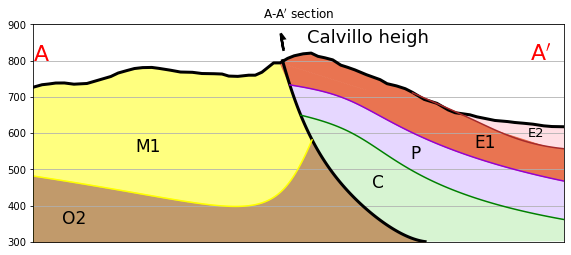

In [26]:
w, h = plt.figaspect(arA)

fig, ax = plt.subplots(figsize=(w,h))
plt.plot(Atopot,Atopoelv,color='black',linewidth=3)


ax.plot(calds_A[4], calds_A[2], color='black',linewidth=3, alpha=1.00)
ax.plot(cpds_A[4], cpds_A[2], color='green', alpha=1.00)

ax.plot(peds_A[4], peds_A[2], color='darkviolet', alpha=1.00)
ax.plot(e1e2_A[4], e1e2_A[2], color='brown', alpha=1.00)
ax.plot(om_A[4], om_A[2], color='yellow', alpha=1.00)



tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(2*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


plt.arrow(4241170, 830, 5, 30, shape='right', head_width=15, head_length=15,linewidth=2.5)


plt.fill_between(om_A[4], om_A[2], color='#C19A6B', alpha=1) # O2
plt.fill_between(calds_A[4][23:], calds_A[2][23:], color='#C19A6B', alpha=1) #O2

plt.fill_between(np.append(Atopot[:27],om_A[4]),np.append(Atopoelv[:27],om_A[2]), color='yellow', alpha=.5) #M1


plt.fill(np.append(cpds_A[4], calds_A[4][::-1]), np.append(cpds_A[2], calds_A[2][::-1]), '#D7F4D2') #C
plt.fill(np.append(peds_A[4], cpds_A[4][::-1]), np.append(peds_A[2], cpds_A[2][::-1]), '#e6d7ff') #P


plt.fill_between(np.append(e1e2_A[4][::-1],Atopot[46:]),
                 np.append(e1e2_A[2][::-1],Atopoelv[46:]), color='pink', alpha=.5)


plt.fill(np.append(peds_A[4],Atopot[26:27]),
                 np.append(peds_A[2],Atopoelv[26:27]), color='#E97451', alpha=1)

plt.fill(np.append(peds_A[4][8:],Atopot[26:44]), 
         np.append(peds_A[2][8:],Atopoelv[26:44]),'#E97451') #brown
plt.fill(np.append(peds_A[4], e1e2_A[4][::-1]), np.append(peds_A[2], e1e2_A[2][::-1]), '#E97451')

t=('Calvillo heigh')
M1=('M1')
O2=('O2')
C=('C')
P=('P')
E1=('E1')
E2=('E2')
A=('A')
AA=('A$^\prime$')

plt.text(4240780, 850, t, ha='right', fontsize=18,rotation=0, wrap=True)
plt.text(4241700, 350, O2, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241500, 550, M1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240900, 450, C, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240800, 530, P, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240600, 560, E1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240470, 590, E2, ha='right', fontsize=13,rotation=0, wrap=True)
plt.text(4241800, 800, A, ha='right', fontsize=22,color='red',rotation=0, wrap=True)
plt.text(4240450, 800, AA, ha='right', fontsize=22,color='red',rotation=0, wrap=True)


plt.ylim((300,900))
plt.xlim((Atopot[0],Atopot[-1]))
plt.grid()
plt.title('A-A$^\prime$ section')
plt.xticks([])

plt.savefig(FIGURESDIR+'A1A2filled.png',facecolor='white',bbox_inches='tight')

plt.show()

### The cross-section B-B'

In [27]:
cal_Bold=bz(int_Cal_th_B,d2n,[100,150,200,250,300,450],
                          [600,500,450,400,350,300],[])

cal_B=bz(int_Cal_th_B,d2n,[100,150,200,250,380,560],
                          [600,570,480,420,370,300],[])

pal_Bold=bz(int_Pal_th_B,d2n,[100,150,200],
                          [500,490,440],[int_F1_B[0],int_F1_B[1],400])
pal_B=bz(int_Pal_th_B,d2n,[100,150,200],
                          [500,490,400],[int_F1_B[0],int_F1_B[1],300])


pal_ds_B=bz(int_Pal_ds_B,d2n,[100,150,200,350],
                             [500,400,350,300],[])

falla_B=[[int_F1_B[0],int_F1_B[0]],[int_F1_B[1],int_F1_B[1]],[int_F1_B[2],100]]
fBt=np.sqrt(int_F1_B[0]**2+int_F1_B[1]**2)
fallan_B=[[fBt,fBt],[int_F1_B[2]-5,100]]

om_B=bz([cal_B[0][37],cal_B[1][37],cal_B[2][37]],d2n,[-150,-200,-1300],[300,400,500],[])

cp1_B=bz([cal_B[0][10],cal_B[1][10],cal_B[2][10]],d2n,
         [200,510,660],[650,420,350],
         [pal_B[0][63],pal_B[1][63],pal_B[2][63]])
cp2_B=bz([pal_B[0][7],pal_B[1][7],pal_B[2][7]],d2n,
         [100,150,250],[640,640,550],
         [int_F1_B[0],int_F1_B[1],550])
cp3_B=bz([int_F1_B[0],int_F1_B[1],450],d2n,
         [100,280],[400,390],
         [pal_ds_B[0][40],pal_ds_B[1][40],pal_ds_B[2][40]])

cp4_B=bz([pal_ds_B[0][37],pal_ds_B[1][37],pal_ds_B[2][37]],d2n,
         [100,500,590,1000],[550,370,320,440],[])

cp1_Bn=bz([cal_B[0][10],cal_B[1][10],cal_B[2][10]],d2n,
         [200,510,660],[650,420,350],
         [pal_B[0][63],pal_B[1][63],pal_B[2][63]])
cp2_Bn=bz([pal_B[0][11],pal_B[1][11],pal_B[2][11]],d2n,
         [100,170,250],[640,600,520],
         [int_F1_B[0],int_F1_B[1],550])
cp3_Bn=bz([int_F1_B[0],int_F1_B[1],450],d2n,
         [100,280],[400,390],
         [pal_ds_B[0][40],pal_ds_B[1][40],pal_ds_B[2][40]])

cp4_Bn=bz([pal_ds_B[0][40],pal_ds_B[1][40],pal_ds_B[2][40]],d2n,
         [100,500,590,1000],[520,300,290,430],[])

pe1_B=bz(int_pec_B,d2n,
         [400,650],[640,410],
         [pal_B[0][28],pal_B[1][28],pal_B[2][28]])
pe2_B=bz(int_pep_B,d2n,
         [100,200,280],[730,680,650],
         [int_F1_B[0],int_F1_B[1],650])
pe3_B=bz([int_F1_B[0],int_F1_B[1],550],d2n,
         [100,200],[500,490],
         [pal_ds_B[0][20],pal_ds_B[1][20],pal_ds_B[2][20]])
pe4_B=bz([pal_ds_B[0][17],pal_ds_B[1][17],pal_ds_B[2][17]],d2n,
         [100,500,590,1000],[650,470,420,540],[])


pe1_Bn=bz(int_pec_B,d2n,
         [400,650],[640,450],
         [pal_B[0][30],pal_B[1][30],pal_B[2][30]])
pe2_Bn=bz(int_pep_B,d2n,
         [100,200,280],[730,680,650],
         [int_F1_B[0],int_F1_B[1],650])
pe3_Bn=bz([int_F1_B[0],int_F1_B[1],550],d2n,
         [100,200],[500,490],
         [pal_ds_B[0][20],pal_ds_B[1][20],pal_ds_B[2][20]])
pe4_Bn=bz([pal_ds_B[0][17],pal_ds_B[1][17],pal_ds_B[2][17]],d2n,
         [100,500,530,590],[650,450,460,470],[])


e1e21_B=bz(int_e12c_B,d2n,
           [200,300],[620,580],
           [pal_B[0][11],pal_B[1][11],pal_B[2][11]])
e1e22_B=bz([int_F1_B[0],int_F1_B[1],650],
           d2n,[100],[560],
           [pal_ds_B[0][8],pal_ds_B[1][8],pal_ds_B[2][8]])

e1e23_B=bz([Btopox[-6],Btopoy[-6],Btopoelv[-8]-10],d2n,
           [200,250],[550,560],[])


e1e21_Bn=bz(int_e12c_B,d2n,
           [200,300],[620,580],
           [pal_B[0][11],pal_B[1][11],pal_B[2][11]])
e1e22_Bn=bz([int_F1_B[0],int_F1_B[1],650],
           d2n,[100],[600],
           [pal_ds_B[0][6],pal_ds_B[1][6],pal_ds_B[2][6]])

e1e23_Bn=bz([Btopox[-6],Btopoy[-6],Btopoelv[-8]-10],d2n,
           [200,250],[550,560],[])


Btopot_aux=Btopot.copy()
Btopoelv_aux=Btopoelv.copy()

Btopot_aux[25]=4242080
Btopoelv_aux[25]=767

Btopot_aux[26]=4242023
Btopoelv_aux[26]=804

C3x=np.concatenate((cp3_B[4],pal_ds_B[4][44:]))
C3y=np.concatenate((cp3_B[2],pal_ds_B[2][44:]))

P1x=np.concatenate((pe1_Bn[4],
                    pal_B[4][30:63] ,
                    cp1_Bn[4][::-1],
                    cal_B[4][0:10][::-1],
                    Btopot[25:27],
                    [pe1_Bn[4][0],pe1_Bn[4][0]]
                   ))

P1y=np.concatenate((pe1_Bn[2],
                    pal_B[2][30:63],
                    cp1_Bn[2][::-1],
                    cal_B[2][0:10][::-1],
                    Btopoelv[25:27], 
                    [pe1_Bn[2][0],pe1_Bn[2][0]-0.1] 
                   ))

P2x=np.concatenate((Btopot[44:46],
                    pe2_Bn[4],
                    cp2_Bn[4][::-1],
                    pal_B[4][0:10],
                    [Btopot[43],Btopot[44]]
                   
                   ))

P2y=np.concatenate((Btopoelv[44:46], 
                    pe2_Bn[2],
                    cp2_Bn[2][::-1],
                    pal_B[2][0:10],
                    [Btopoelv[43],Btopoelv[44]]
                    
                   ))


P3x=np.concatenate((pe3_Bn[4],
                    pal_ds_B[4][25:30],
                    cp3_Bn[4][::-1],
                    
                   
                   ))

P3y=np.concatenate((pe3_Bn[2],
                    pal_ds_B[2][25:30],
                    cp3_Bn[2][::-1],
                    
                    
                   ))


P4x=np.concatenate((cp4_Bn[4][::-1],
                    pal_ds_B[4][20:28],
                    pe4_Bn[4],
                   ))

P4y=np.concatenate((cp4_Bn[2][::-1], 
                    pal_ds_B[2][20:28],
                    pe4_Bn[2],
                   ))


E11x=np.concatenate((pe1_Bn[4][::-1],
                    Btopot[27:36],
                    e1e21_B[4],
                    pal_B[4][11:30]
                    ))
E11y=np.concatenate((pe1_Bn[2][::-1],
                    Btopoelv[27:36],
                    e1e21_B[2],
                    pal_B[2][11:30]
                    ))

E12x=np.concatenate((pe2_Bn[4][::-1],
                    Btopot[45:56]
                    ))
E12y=np.concatenate((pe2_Bn[2][::-1],
                    Btopoelv[45:56]
                    ))

E13x=np.concatenate((e1e22_Bn[4],
                     pal_ds_B[4][7:20],
                     pe3_Bn[4][::-1]
                    ))
E13y=np.concatenate((e1e22_Bn[2],
                     pal_ds_B[2][7:20],
                     pe3_Bn[2][::-1],
                    ))

E14x=np.concatenate((pe4_Bn[4][::-1],
                     pal_ds_B[4][:20][::-1],
                    Btopot[60:70],
                    e1e23_B[4],
                    ))
E14y=np.concatenate((pe4_Bn[2][::-1],
                     pal_ds_B[2][:20][::-1],
                    Btopoelv[60:70],
                    e1e23_B[2],
                    ))

E21x=np.concatenate((e1e21_Bn[4][::-1],
                     Btopot[37:40],
                     pal_B[4][:11]
                    ))
E21y=np.concatenate((e1e21_Bn[2][::-1],
                     Btopoelv[37:40],
                     pal_B[2][:11]
                    ))

E22x=np.concatenate((Btopot[55:58],
                     pal_ds_B[4][:7],
                     e1e22_Bn[4][::-1]
                     ))
E22y=np.concatenate((Btopoelv[55:58],
                     pal_ds_B[2][:7],
                     e1e22_Bn[2][::-1]
                    ))

E23x=np.concatenate((e1e23_Bn[4][::-1],
                     Btopot[70:]
                     ))
E23y=np.concatenate((e1e23_Bn[2][::-1],
                     Btopoelv[70:]
                    ))

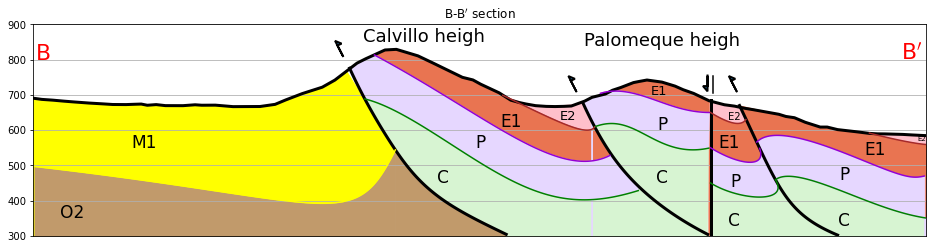

In [28]:
w, h = plt.figaspect(arB)

fig, ax = plt.subplots(figsize=(w,h))

plt.plot(Btopot,Btopoelv,color='black',linewidth=3)


ax.plot(fallan_B[0], fallan_B[1], color='black', alpha=1.00,linewidth=3)

ax.plot(cal_B[4], cal_B[2], color='black', alpha=1.00,linewidth=3)
ax.plot(pal_B[4], pal_B[2], color='black', alpha=1.00,linewidth=3)
ax.plot(pal_ds_B[4], pal_ds_B[2], color='black', alpha=1.00,linewidth=3)
ax.plot(om_B[4], om_B[2], color='yellow', alpha=1.00)

ax.plot(cp1_B[4], cp1_B[2], color='green', alpha=1.00)
ax.plot(cp2_Bn[4], cp2_Bn[2], color='green', alpha=1.00)

ax.plot(cp3_B[4], cp3_B[2], color='green', alpha=1.00)
ax.plot(cp4_Bn[4], cp4_Bn[2], color='green', alpha=1.00)


ax.plot(pe1_Bn[4], pe1_Bn[2], color='darkviolet', alpha=1.00)

ax.plot(pe2_B[4], pe2_B[2], color='darkviolet', alpha=1.00)
ax.plot(pe3_B[4], pe3_B[2], color='darkviolet', alpha=1.00)
ax.plot(pe4_Bn[4], pe4_Bn[2], color='darkviolet', alpha=1.00)



ax.plot(e1e21_B[4], e1e21_B[2], color='brown', alpha=1.00)
ax.plot(e1e22_Bn[4], e1e22_Bn[2], color='brown', alpha=1.00)

ax.plot(e1e23_B[4], e1e23_B[2], color='brown', alpha=1.00)

ax.fill_between(E21x,E21y,color='pink', alpha=1) #E2_1
ax.fill_between(E22x,E22y,color='pink', alpha=1) #E2_2
ax.fill_between(E23x,E23y,color='pink', alpha=1) #E2_3



ax.fill_between(E11x,E11y,color='#E97451', alpha=1) #E1_1
ax.fill_between(E12x,E12y,color='#E97451', alpha=1) #E1_2
ax.fill_between(E13x,E13y,color='#E97451', alpha=1) #E1_3
ax.fill_between(E14x,E14y,color='#E97451', alpha=1) #E1_4



ax.fill_between(P1x,P1y,color='#e6d7ff', alpha=1)

plt.fill_between(om_B[4], om_B[2], color='#C19A6B', alpha=1) #O2
plt.fill_between(cal_B[4][37:], cal_B[2][37:], color='#C19A6B', alpha=1) #O2


plt.fill_between(np.append(Btopot_aux[:26],om_B[4]),
                 np.append(Btopoelv_aux[:26],om_B[2]), color='yellow', alpha=1) #M1

plt.fill(np.append(cp1_B[4], cal_B[4][::-1]), np.append(cp1_B[2], cal_B[2][::-1]), '#D7F4D2',alpha=1) #C1
plt.fill_between(cp1_B[4][53:], cp1_B[2][53:], color='#D7F4D2', alpha=1) #C1
plt.fill_between(pal_B[4][60:], pal_B[2][60:], color='#D7F4D2', alpha=1) #C1

plt.fill(np.append(cp2_Bn[4], pal_B[4][::-1]), np.append(cp2_Bn[2], pal_B[2][::-1]), '#D7F4D2') #C2


plt.fill_between(C3x, C3y, color='#D7F4D2', alpha=1) #C3

plt.fill(np.append(cp4_Bn[4], pal_ds_B[4][::-1]), np.append(cp4_Bn[2], pal_ds_B[2][::-1]), '#D7F4D2') #C4
plt.fill_between(cp4_Bn[4][23:], cp4_Bn[2][23:], color='#D7F4D2', alpha=1) #C1


ax.fill_between(P2x,P2y,color='#e6d7ff', alpha=1) #P
ax.fill_between(P3x,P3y,color='#e6d7ff', alpha=1) #P
ax.fill_between(P4x,P4y,color='#e6d7ff', alpha=1) #P


t1=('Calvillo heigh')
t2=('Palomeque heigh')
M1=('M1')
O2=('O2')
C=('C')
P=('P')
E1=('E1')
E2=('E2')
B=('B')
BB=('B$^\prime$')

plt.text(4241700, 850, t1, ha='right', fontsize=18,rotation=0, wrap=True)
plt.text(4241000, 840, t2, ha='right', fontsize=18,rotation=0, wrap=True)

plt.text(4242800, 350, O2, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242600, 550, M1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241800, 450, C, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241200, 450, C, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241000, 330, C, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240700, 330, C, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4241700, 550, P, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241200, 600, P, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241000, 440, P, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240700, 460, P, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4241600, 610, E1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241200, 700, E1, ha='right', fontsize=13,rotation=0, wrap=True)
plt.text(4241000, 550, E1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4240600, 530, E1, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4241450, 630, E2, ha='right', fontsize=13,rotation=0, wrap=True)
plt.text(4241000, 630, E2, ha='right', fontsize=10,rotation=0, wrap=True)
plt.text(4240490, 570, E2, ha='right', fontsize=7,rotation=0, wrap=True)


plt.text(4242890, 800, B, ha='right', fontsize=22,color='red',rotation=0, wrap=True)
plt.text(4240500, 800, BB, ha='right', fontsize=22,color='red',rotation=0, wrap=True)

plt.arrow(4242090, 810, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)
plt.arrow(4241450, 710, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)
plt.arrow(4241010, 710, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)
plt.arrow(4241090, 755, 0, -30, shape='right', head_width=25, head_length=15,linewidth=2)
ax.plot([4241075,4241075],[755,705],color='black')


tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(2*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks([])

plt.ylim((300,900))
plt.xlim((Btopot[0]-20,Btopot[-1]))


plt.grid()
plt.title('B-B$^\prime$ section')

plt.savefig(FIGURESDIR+'B1B2filled.png',facecolor='white',bbox_inches='tight')

plt.show()

### The cross-section C-C'

In [29]:
cal_C=bz(int_Cal_th_C,d3n,[100,200,350,450],[550,400,310,300],[])
pal_C=bz(int_Pal_th_C,d3n,[100,200,350,450],[520,370,310,300],[])


om_C=bz([cal_C[0][27],cal_C[1][27],cal_C[2][27]],d3n,
        [-150,-200,-1000],[300,400,500],[])


cp1_C=bz([cal_C[0][8],cal_C[1][8],cal_C[2][8]],d3n,
         [300,510,660],[750,500,300],
         #[250,500,600,950],[790,380,250,200],
         [pal_C[0][40],pal_C[1][40],pal_C[2][40]])

cp2_C=bz([pal_C[0][5],pal_C[1][5],pal_C[2][5]],d3n,
         [100,400,900],[670,370,300],
         [])


cp1_Cn=bz([cal_C[0][12],cal_C[1][12],cal_C[2][12]],d3n,
         [300,510,660],[700,450,250],
         #[250,500,600,950],[790,380,250,200],
         [pal_C[0][43],pal_C[1][43],pal_C[2][43]])

cp2_Cn=bz([pal_C[0][12],pal_C[1][12],pal_C[2][12]],d3n,
         [100,400,850],[650,320,290],
         [])


pe1_C=bz(int_pec_C,d3n,
         [200,400,550],[650,570,390],
         [pal_C[0][24],pal_C[1][24],pal_C[2][24]])
pe2_C=bz(int_pep_C,d3n,[400,500,1100,1300,1400,1500],
          [500,390,310,320,380,310],[])

pe1_Cn=bz(int_pec_C,d3n,
         [200,400,550],[650,570,390],
         [pal_C[0][24],pal_C[1][24],pal_C[2][24]])
pe2_Cn=bz(int_pep_C,d3n,[400,500,1100,1300,1400,1500],
          [500,390,310,320,400,340],[])

e1e21_C=bz(int_e12c_C,d3n,
           [100,200],[600,550],
           [pal_C[0][10],pal_C[1][10],pal_C[2][10]])
e1e22_C=bz(int_e12p_C,d3n,
           [200,350,900,1200,1300],[600,500,340,500,400],[])


e1e21_Cn=bz(int_e12c_C,d3n,
           [100,200],[600,550],
           [pal_C[0][10],pal_C[1][10],pal_C[2][10]])
e1e22_Cn=bz([int_e12p_C[0],int_e12p_C[1],int_e12p_C[2]+8],d3n,
           [200,350,900,1200,1300],[600,500,350,530,430],[])


e2e3_C=bz(int_e23p_C,d3n,[200,350,800,830],[570,550,500,540],[])


e2e3_Cn=bz(int_e23p_C,d3n,[200,350,800,830],[570,480,630,525],[])

OCx=np.concatenate((om_C[4][::-1],
                   cal_C[4][27:]))
OCy=np.concatenate((om_C[2][::-1],
                   cal_C[2][27:]))

MCx=np.concatenate((Ctopot[:20],
                    cal_C[4][:27],
                   om_C[4]
                   ))
MCy=np.concatenate((Ctopoelv[:20],
                    cal_C[2][:27],
                   om_C[2]))

CC1x=np.concatenate((cal_C[4][20:][::-1],
                    cp1_Cn[4],
                    pal_C[4][43:]
                   ))
CC1y=np.concatenate((cal_C[2][20:][::-1],
                    cp1_Cn[2],
                    pal_C[2][43:]))

CC2x=np.concatenate((pal_C[4][10:][::-1],
                    cp2_Cn[4]
                   ))
CC2y=np.concatenate((pal_C[2][10:][::-1],
                    cp2_Cn[2]))

CP1x=np.concatenate((cp1_Cn[4][::-1],
                     cal_C[4][:10][::-1],
                     Ctopot[20:23],
                     pe1_Cn[4],
                     pal_C[4][20:42]
                   ))
CP1y=np.concatenate((cp1_Cn[2][::-1],
                     cal_C[2][:10][::-1],
                     Ctopoelv[20:23],
                     pe1_Cn[2],
                     pal_C[2][20:42]))

CP2x=np.concatenate((cp2_Cn[4][::-1],
                     pal_C[4][:10][::-1],
                     Ctopot[40:42],
                     pe2_Cn[4],
                   ))
CP2y=np.concatenate((cp2_Cn[2][::-1],
                     pal_C[2][:10][::-1],
                     Ctopoelv[40:42],
                     pe2_Cn[2]))

CE11x=np.concatenate((pe1_Cn[4][::-1],
                      Ctopot[25:32],
                      e1e21_Cn[4],
                      pal_C[4][10:25]
                   ))
CE11y=np.concatenate((pe1_Cn[2][::-1],
                      Ctopoelv[25:32],
                      e1e21_Cn[2],
                      pal_C[2][10:25]
                   ))

CE12x=np.concatenate((pe2_Cn[4][::-1],
                      Ctopot[43:50],
                      e1e22_Cn[4]
                   ))
CE12y=np.concatenate((pe2_Cn[2][::-1],
                      Ctopoelv[43:50],
                      e1e22_Cn[2]
                   ))

CE21x=np.concatenate((e1e21_Cn[4][::-1],
                      Ctopot[37:39],
                      pal_C[4][:10]
                   ))
CE21y=np.concatenate((e1e21_Cn[2][::-1],
                      Ctopoelv[37:39],
                      pal_C[2][:10]
                   ))

CE22x=np.concatenate((e1e22_Cn[4][::-1],
                      Ctopot[50:55],
                      e2e3_Cn[4]
                   ))
CE22y=np.concatenate((e1e22_Cn[2][::-1],
                      Ctopoelv[50:55],
                      e2e3_Cn[2]
                   ))

CE3x=np.concatenate((e2e3_Cn[4][::-1],
                      Ctopot[60:]
                   ))
CE3y=np.concatenate((e2e3_Cn[2][::-1],
                      Ctopoelv[60:]
                   ))

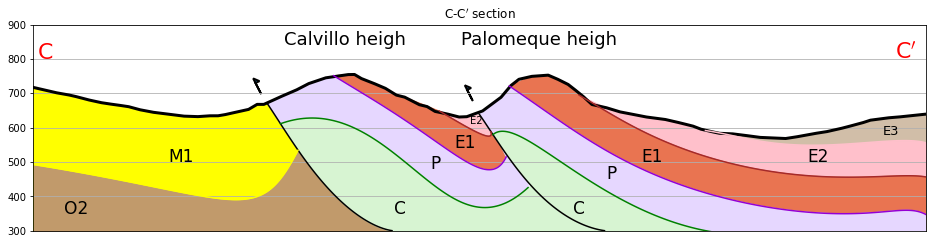

In [30]:
w, h = plt.figaspect(arC)

fig, ax = plt.subplots(figsize=(w,h))

plt.plot(Ctopot,Ctopoelv,color='black',linewidth=3)

ax.plot(cal_C[4], cal_C[2], color='black', alpha=1.00)
ax.plot(pal_C[4],pal_C[2], color='black', alpha=1.00)
ax.plot(om_C[4],om_C[2], color='yellow', alpha=1.00)
#ax.plot(cp1_C[4], cp1_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(cp1_Cn[4], cp1_Cn[2], color='green', alpha=1.00)

#ax.plot(cp2_C[4], cp2_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(cp2_Cn[4], cp2_Cn[2], color='green', alpha=1.00)

#ax.plot(pe1_C[4], pe1_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(pe1_Cn[4], pe1_Cn[2], color='darkviolet', alpha=1.00)

#ax.plot(pe2_C[4], pe2_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(pe2_Cn[4], pe2_Cn[2], color='darkviolet', alpha=1.00)

ax.plot(e1e21_C[4], e1e21_C[2], color='brown', alpha=1.00)
#ax.plot(e1e22_C[4], e1e22_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(e1e22_Cn[4], e1e22_Cn[2], color='brown', alpha=1.00)

#ax.plot(e2e3_C[4], e2e3_C[2], color='red', alpha=1.00,linestyle='dashed')
ax.plot(e2e3_Cn[4], e2e3_Cn[2], color='pink', alpha=1.00)


ax.fill_between(OCx,OCy,color='#C19A6B', alpha=1) #O
ax.fill_between(MCx,MCy,color='yellow', alpha=1) #M

ax.fill_between(CE3x,CE3y,color='#D1BEA8',alpha=1) #E3


ax.fill_between(CE21x,CE21y,color='pink', alpha=1) #E2_1
ax.fill_between(CE22x,CE22y,color='pink', alpha=1) #E2_2

ax.fill_between(CE11x,CE11y,color='#E97451', alpha=1) #E1_1
ax.fill_between(CE12x,CE12y,color='#E97451', alpha=1) #E1_2



ax.fill_between(CP1x,CP1y,color='#e6d7ff', alpha=1) #P1
ax.fill_between(CP2x,CP2y,color='#e6d7ff', alpha=1) #P1

ax.fill_between(CC1x,CC1y,color='#D7F4D2',alpha=1) #C1
ax.fill_between(CC2x,CC2y,color='#D7F4D2',alpha=1) #C2


t1=('Calvillo heigh')
t2=('Palomeque heigh')
M1=('M1')
O2=('O2')
C=('C')
P=('P')
E1=('E1')
E2=('E2')
E3=('E3')
C_1=('C')
CC_1=('C$^\prime$')

plt.text(4242000, 840, t1, ha='right', fontsize=18,rotation=0, wrap=True)
plt.text(4241400, 840, t2, ha='right', fontsize=18,rotation=0, wrap=True)

plt.text(4242900, 350, O2, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242600, 500, M1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242000, 350, C, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241490, 350, C, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4241900, 480, P, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241400, 450, P, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241800, 540, E1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241270, 500, E1, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241780, 610, E2, ha='right', fontsize=10,rotation=0, wrap=True)
plt.text(4240800, 500, E2, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4240600, 580, E3, ha='right', fontsize=13,rotation=0, wrap=True)

plt.text(4243000, 800, C_1, ha='right', fontsize=22,color='red',rotation=0, wrap=True)
plt.text(4240550, 800, CC_1, ha='right', fontsize=22,color='red',rotation=0, wrap=True)


plt.arrow(4242410, 700, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)
plt.arrow(4241810, 680, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)

tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(2*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks([])

plt.ylim((300,900))
plt.xlim((Ctopot[0],Ctopot[-1]))


plt.grid()
plt.title('C-C$^\prime$ section')

plt.savefig(FIGURESDIR+'C1C2filled.png',facecolor='white',bbox_inches='tight')

plt.show()

### The cross-section D-D'

In [31]:
cal_D=bz(int_Cal_th_D,d4n,[100,300,450,550],[500,300,350,290],[])
pal_D=bz(int_Pal_th_D,d4n,[100,200,350,450],[500,300,350,300],[])

om_D=bz([cal_D[0][16],cal_D[1][16],cal_D[2][16]],d3n,
        [-150,-200,-900],[300,400,500],[])


cp1_D=bz([pal_D[0][3],pal_D[1][3],pal_D[2][3]],d4n,
         [250,270,500,700,900],[600,450,400,350,300],[])


cp1_Dn=bz([pal_D[0][1],pal_D[1][1],pal_D[2][1]],d4n,
         [230,270,500,700,850],[670,500,400,310,300],[])


pe0_D=bz([cal_D[0][15],cal_D[1][15],cal_D[2][15]],d4n,
         [40],[470],[pal_D[0][15],pal_D[1][15],pal_D[2][15]])
pe1_D=bz(int_pep_D,d4n,
         [250,270,500,800,1500],[710,500,480,350,300],[])

pe0_Dn=bz([cal_D[0][17],cal_D[1][17],cal_D[2][17]],d4n,
         [40],[460],[pal_D[0][17],pal_D[1][17],pal_D[2][17]])
pe1_Dn=bz(int_pep_D,d4n,
         [250,270,500,800,1500],[710,520,440,300,330],[])

e1e20_D=bz([cal_D[0][5],cal_D[1][5],cal_D[2][5]],d4n,
           [60],[560],[pal_D[0][5],pal_D[1][5],pal_D[2][5]])

e1e21_D=bz(int_e12p_D,d4n,
           [250,270,500,800,1300],[580,500,480,380,410],[])

e1e20_Dn=bz([cal_D[0][5],cal_D[1][5],cal_D[2][5]],d4n,
           [60],[560],[pal_D[0][5],pal_D[1][5],pal_D[2][5]])

e1e21_Dn=bz(int_e12p_D,d4n,
           [250,270,500,800,1300],[580,440,460,380,420],[])

e2e3_D=bz([int_e23p_D[0],int_e23p_D[1],int_e23p_D[2]-20],d4n,
          [250,270,500,950],[530,540,530,490],[])


e2e3_Dn=bz([int_e23p_D[0],int_e23p_D[1],int_e23p_D[2]-20],d4n,
          [250,270,500,940],[500,510,500,490],[])


e3eO_D=bz(int_e3op_D,d4n,[250,270,600],[550,560,570],[])


ODx=np.concatenate((om_D[4][::-1],
                   cal_D[4][27:]))
ODy=np.concatenate((om_D[2][::-1],
                   cal_D[2][27:]))

MDx=np.concatenate((Dtopot[:31],
                    cal_D[4][:18],
                   om_D[4]
                   ))
MDy=np.concatenate((Dtopoelv[:31],
                    cal_D[2][:18],
                   om_D[2]))

CDx=np.concatenate((pal_D[4][::-1],
                   cp1_Dn[4]
                   ))
CDy=np.concatenate((pal_D[2][::-1],
                   cp1_Dn[2]
                   ))

DP1x=np.concatenate((cal_D[4][15:][::-1],
                   pe0_Dn[4],
                   pal_D[4][15:] 
                   ))
DP1y=np.concatenate((cal_D[2][15:][::-1],
                   pe0_Dn[2],
                   pal_D[2][15:] 
                   ))

DP2x=np.concatenate((cp1_Dn[4][::-1],
                     Dtopot[35:40],
                     pe1_Dn[4]
                   ))
DP2y=np.concatenate((cp1_Dn[2][::-1],
                     Dtopoelv[35:40],
                     pe1_Dn[2]
                   ))

DE11x=np.concatenate((pe0_Dn[4][::-1],
                     cal_D[4][7:15][::-1],
                     e1e20_D[4],
                   pal_D[4][7:18] 
                   ))
DE11y=np.concatenate((pe0_Dn[2][::-1],
                     cal_D[2][7:15][::-1],
                     e1e20_D[2],
                   pal_D[2][7:18] 
                   ))

DE12x=np.concatenate((pe1_Dn[4][::-1],
                      Dtopot[40:45],
                     e1e21_Dn[4]))
DE12y=np.concatenate((pe1_Dn[2][::-1],
                      Dtopoelv[40:45],
                     e1e21_Dn[2]))

DE21x=np.concatenate((e1e20_Dn[4][::-1],
                     cal_D[4][:4][::-1],
                     Dtopot[32:34],
                      pal_D[4][:7]
                    ))
DE21y=np.concatenate((e1e20_Dn[2][::-1],
                     cal_D[2][:4][::-1],
                     Dtopoelv[32:34],
                      pal_D[2][:7]
                    ))

DE22x=np.concatenate((e1e21_Dn[4][::-1],
                      Dtopot[46:49],
                      e2e3_Dn[4]
                     ))
DE22y=np.concatenate((e1e21_Dn[2][::-1],
                      Dtopoelv[46:49],
                      e2e3_Dn[2]
                     )  )          

DE3x=np.concatenate((e2e3_Dn[4][::-1],
                      Dtopot[55:61],
                      e3eO_D[4]
                     ))
DE3y=np.concatenate((e2e3_Dn[2][::-1],
                      Dtopoelv[55:61],
                      e3eO_D[2]
                     ))

DE4x=np.concatenate((e3eO_D[4][::-1],
                      Dtopot[66:]))
DE4y=np.concatenate((e3eO_D[2][::-1],
                      Dtopoelv[66:]))

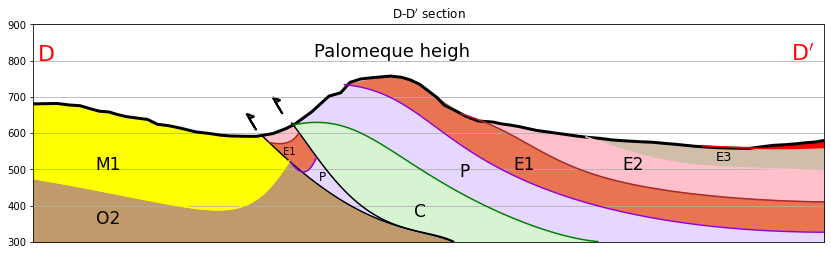

In [32]:
w, h = plt.figaspect(arD)

fig, ax = plt.subplots(figsize=(w,h))

plt.plot(Dtopot,Dtopoelv,color='black',linewidth=3)

ax.plot(cal_D[4], cal_D[2], color='black', alpha=1.00)
ax.plot(pal_D[4], pal_D[2], color='black', alpha=1.00)
ax.plot(om_D[4], om_D[2], color='yellow', alpha=1.00)
ax.plot(cp1_Dn[4], cp1_Dn[2], color='green', alpha=1.00)

ax.plot(pe0_Dn[4], pe0_Dn[2], color='darkviolet', alpha=1.00)


ax.plot(pe1_Dn[4], pe1_Dn[2], color='darkviolet', alpha=1.00)

ax.plot(e1e20_D[4], e1e20_D[2], color='brown', alpha=1.00)
ax.plot(e1e21_Dn[4], e1e21_Dn[2], color='brown', alpha=1.00)

ax.plot(e2e3_Dn[4], e2e3_Dn[2], color='pink', alpha=1.00)

ax.plot(e3eO_D[4], e3eO_D[2], color='r', alpha=1)

ax.fill_between(DE4x,DE4y,color='r',alpha=1) #E4

ax.fill_between(DE3x,DE3y,color='#D1BEA8',alpha=1) #E3

ax.fill_between(DE21x,DE21y,color='pink', alpha=1) #E2_1
ax.fill_between(DE22x,DE22y,color='pink', alpha=1) #E2_2


ax.fill_between(DE11x,DE11y,color='#E97451', alpha=1) #E1_1
ax.fill_between(DE12x,DE12y,color='#E97451', alpha=1) #E1_2

ax.fill_between(ODx,ODy,color='#C19A6B', alpha=1) #O
ax.fill_between(MDx,MDy,color='yellow', alpha=1) #M

ax.fill_between(CDx,CDy,color='#D7F4D2',alpha=1) #C1

ax.fill_between(DP1x,DP1y,color='#e6d7ff', alpha=1) #P1
ax.fill_between(DP2x,DP2y,color='#e6d7ff', alpha=1) #P2


t1=('Calvillo heigh')
t2=('Palomeque heigh')
M1=('M1')
O2=('O2')
C=('C')
P=('P')
E1=('E1')
E2=('E2')
E3=('E3')
D=('D')
DD=('D$^\prime$')


plt.text(4241800, 810, t2, ha='right', fontsize=18,rotation=0, wrap=True)

plt.text(4242600, 350, O2, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242600, 500, M1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4241900, 370, C, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4242130, 470, P, ha='right', fontsize=12,rotation=0, wrap=True)
plt.text(4241800, 480, P, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4242200, 540, E1, ha='right', fontsize=10,rotation=0, wrap=True)
plt.text(4241650, 500, E1, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241400, 500, E2, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241200, 523, E3, ha='right', fontsize=13,rotation=0, wrap=True)

plt.text(4242750, 800, D, ha='right', fontsize=22,color='red',rotation=0, wrap=True)
plt.text(4241010, 800, DD, ha='right', fontsize=22,color='red',rotation=0, wrap=True)


plt.arrow(4242290, 610, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)
plt.arrow(4242230, 655, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)



tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(2*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks([])

plt.ylim((300,900))
plt.xlim((4242800,Dtopot[-1]))


plt.grid()
plt.title('D-D$^\prime$ section')

plt.savefig(FIGURESDIR+'D1D2filled.png',facecolor='white',bbox_inches='tight')

plt.show()

### The cross-section E-E'

In [33]:
pal_E=bz(int_Pal_th_E,d5n,[100,200,450],[500,400,300],[])

om_E=bz([pal_E[0][22],pal_E[1][22],pal_E[2][22]],d3n,
        [-150,-200,-900],[300,400,500],[])


cp_E=bz([pal_E[0][22],pal_E[1][22],pal_E[2][22]],d5n,
        [300,400,550,800],[600,450,350,300],[])

cp_En=bz([pal_E[0][22],pal_E[1][22],pal_E[2][22]],d5n,
        [300,400,550,700],[600,450,350,300],[])

pep_E=bz(int_pep_E,d5n,
         [250,270,430,600,800,1100],[680,670,560,490,350,300],[])

pep_En=bz(int_pep_E,d5n,
         [250,270,430,600,800,1000],[680,670,560,490,350,300],[])

e1e2_E=bz(int_e12p_E,d5n,
          [260,260,300,500,700,800,1000],[600,530,490,440,400,320,390],[])

e1e2_En=bz(int_e12p_E,d5n,
          [260,260,300,500,700,800,1000],[600,580,500,440,400,320,360],[])

e2e3_E=bz(int_e23p_E,d5n,[150,100,400,900],[500,560,410,500],[])

e3eO_E=bz(int_e3op_E,d5n,[250,270],[500,540],[])

OEx=np.concatenate((om_E[4][::-1],
                   pal_E[4][27:]))
OEy=np.concatenate((om_E[2][::-1],
                   pal_E[2][27:]))

MEx=np.concatenate((Etopot[:31],
                    pal_E[4][:18],
                   om_E[4]
                   ))
MEy=np.concatenate((Etopoelv[:31],
                    pal_E[2][:18],
                   om_E[2]))

CEx=np.concatenate((pal_E[4][27:][::-1],
                  cp_En[4]))
CEy=np.concatenate((pal_E[2][27:][::-1],
                  cp_En[2]))

PEx=np.concatenate((pal_E[4][:27][::-1],
                   Etopot[20:23],
                    pep_En[4]
                   ))
PEy=np.concatenate((pal_E[2][:27][::-1],
                   Etopoelv[20:23],
                    pep_En[2]
                   ))

E1Ex=np.concatenate((pep_En[4][::-1],
                    Etopot[23:50],
                     e1e2_En[4]
                    ))
E1Ey=np.concatenate((pep_En[2][::-1],
                    Etopoelv[23:50],
                     e1e2_En[2]
                    ))

E2Ex=np.concatenate((e1e2_En[4][::-1],
                    Etopot[50:57],
                     e2e3_E[4]
                    ))
E2Ey=np.concatenate((e1e2_En[2][::-1],
                    Etopoelv[50:57],
                     e2e3_E[2]
                    ))

E3Ex=np.concatenate((e2e3_E[4][::-1],
                    Etopot[57:63],
                    e3eO_E[4]
                     ))
E3Ey=np.concatenate((e2e3_E[2][::-1],
                    Etopoelv[57:63],
                    e3eO_E[2]
                     ))

E4Ex=np.concatenate((e3eO_E[4][::-1],Etopot[63:]))
E4Ey=np.concatenate((e3eO_E[2][::-1],Etopoelv[63:]))

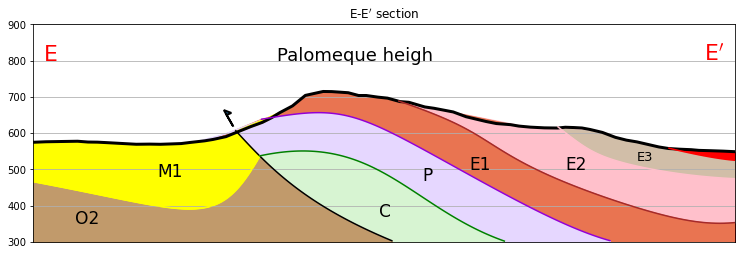

In [34]:
w, h = plt.figaspect(arE)

fig, ax = plt.subplots(figsize=(w,h))

plt.plot(Etopot,Etopoelv,color='black',linewidth=3)

ax.plot(pal_E[4], pal_E[2], color='black', alpha=1.00)
ax.plot(om_E[4], om_E[2], color='yellow', alpha=1.00)
ax.plot(cp_En[4], cp_En[2], color='green', alpha=1.00)

ax.plot(pep_En[4], pep_En[2], color='darkviolet', alpha=1.00)
ax.plot(e1e2_En[4], e1e2_En[2], color='brown', alpha=1.00)

ax.plot(e2e3_E[4], e2e3_E[2], color='pink', alpha=1.00)
ax.plot(e3eO_E[4], e3eO_E[2], color='r', alpha=1.00)

ax.fill_between(E4Ex,E4Ey,color='r',alpha=1) #E4

ax.fill_between(E3Ex,E3Ey,color='#D1BEA8',alpha=1) #E3

ax.fill_between(E2Ex,E2Ey,color='pink', alpha=1) #E2

ax.fill_between(E1Ex,E1Ey,color='#E97451', alpha=1) #E1

ax.fill_between(PEx,PEy,color='#e6d7ff', alpha=1) #P1

ax.fill_between(CEx,CEy,color='#D7F4D2',alpha=1) #C1

ax.fill_between(OEx,OEy,color='#C19A6B', alpha=1) #O
ax.fill_between(MEx,MEy,color='yellow', alpha=1) #M


t1=('Calvillo heigh')
t2=('Palomeque heigh')
M1=('M1')
O2=('O2')
C=('C')
P=('P')
E1=('E1')
E2=('E2')
E3=('E3')
E=('E')
EE=('E$^\prime$')


plt.text(4242200, 800, t2, ha='right', fontsize=18,rotation=0, wrap=True)

plt.text(4243000, 350, O2, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242800, 480, M1, ha='right', fontsize=17,rotation=0, wrap=True)
plt.text(4242300, 370, C, ha='right', fontsize=17,rotation=0, wrap=True)


plt.text(4242200, 470, P, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4242060, 500, E1, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241830, 500, E2, ha='right', fontsize=17,rotation=0, wrap=True)

plt.text(4241670, 523, E3, ha='right', fontsize=13,rotation=0, wrap=True)

plt.text(4243100, 800, E, ha='right', fontsize=22,color='red',rotation=0, wrap=True)
plt.text(4241500, 800, EE, ha='right', fontsize=22,color='red',rotation=0, wrap=True)


plt.arrow(4242680, 620, 15, 30, shape='right', head_width=25, head_length=15,linewidth=2)


tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(2*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks([]) 

plt.ylim((300,900))
plt.xlim((Etopot[0]-200,Etopot[-1]))


plt.grid()
plt.title('E-E$^\prime$ section')

plt.savefig(FIGURESDIR+'E1E2filled.png',facecolor='white',bbox_inches='tight')

plt.show()